In [12]:
import numpy as np
import pandas as pd
data = pd.read_csv('Covid.csv')
X = data.loc[:,('SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES')]
y= data['CLASIFFICATION_FINAL']
print(data)
print ("Label kelas: ", np.unique(y))

      USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0         2             3    2             2  13/04/2020        1          1   
1         1             3    2             2  14/04/2020        1          1   
2         1             3    1             2  14/04/2020        2          1   
3         2             3    2             2  14/04/2020        1          1   
4         2             3    1             2  15/04/2020        1          1   
...     ...           ...  ...           ...         ...      ...        ...   
1438      1             3    1             2  18/08/2020        1          1   
1439      1             3    2             2  19/08/2020        1          1   
1440      1             3    2             2  20/08/2020        1          1   
1441      2             3    2             2  25/08/2020        1          1   
1442      1             3    2             2  25/08/2020        2          1   

      AGE  PREGNANT  DIABETES  ...  AST

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

print(X[0:5,:])

[[ 0.74158364  0.31465839 -0.4254194  -0.37990775 -0.31066268  0.74043741
  -0.01931947]
 [ 0.74158364  0.31465839 -0.4254194  -0.37990775  0.42085322  0.74043741
  -0.15870942]
 [-1.34846556  0.31465839 -0.39569442 -0.37990775  1.48487635 -1.35037896
  -0.15870942]
 [ 0.74158364  0.31465839 -0.4254194  -0.37990775 -0.31066268  0.74043741
  -0.15870942]
 [-1.34846556  0.31465839 -0.4254194  -0.37990775  0.28785033 -1.35037896
  -0.01931947]]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 0.74158364 -3.17804972  2.42817823 -0.37990775 -0.84267424  0.74043741
  -0.01931947]
 [ 0.74158364  0.31465839 -0.4254194  -0.37990775 -0.11115834  0.74043741
  -0.15870942]
 [-1.34846556  0.31465839 -0.39569442 -0.37990775  0.22134889 -1.35037896
  -0.01931947]
 [-1.34846556  0.31465839 -0.4254194  -0.37990775 -1.84019592 -1.35037896
  -0.01931947]
 [ 0.74158364 -3.17804972  2.42817823 -0.37990775  2.34939514  0.74043741
  -0.01931947]]
y Training: 1182    3
1096    3
438     3
506     6
880     3
Name: CLASIFFICATION_FINAL, dtype: int64


In [8]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=0)

In [9]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[-9.03825438e-06  2.22044605e-16  2.81728045e-04  0.00000000e+00
  -1.48544950e-05 -9.04157195e-06  8.08705695e-04]
 [ 0.00000000e+00  0.00000000e+00 -1.31074770e-04  0.00000000e+00
   9.77336730e-05  0.00000000e+00 -3.39219982e-04]
 [ 1.11022302e-16  0.00000000e+00  0.00000000e+00  2.22044605e-16
   2.14363081e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.49803842e-02  3.09013891e-02  0.00000000e+00
   4.79823351e-06  4.44089210e-16  4.56484939e-03]
 [-1.33024263e-04  2.30251078e-02  2.85717142e-02 -5.94428106e-04
  -2.68424217e-04 -1.33073091e-04  5.02514762e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00002941e-07  0.00000000e+00  0.00000000e+00]
 [-3.48308056e-04  8.88178420e-16 -3.31979481e-05  8.88178420e-16
  -9.39143873e-06  3.41638025e-04 -6.57085442e-06]
 [-1.11351482e-02  5.65720305e-01  6.30192300e-01  4.94690530e-01
   1.96622184e-01 -1.11392354e-02  2.40084724e-01]
 [ 9.59839733e-03  5.66559281e-01  6.93453326

In [10]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Akurasi : 77.59815242494227 %


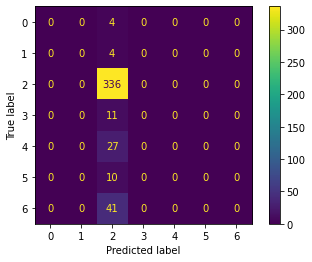

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))